In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

"""
Problem 1 from Morgan Stanley Case Study
Requires Python (Jupyter Notebook)
Rondell King
"""
###
### LOAD AND SANITIZE DATA###
###

# Load xls sheets into dataframes
data_file = '2_Data_Files.xlsx'  # File must be in the same directory as this script

# Each sheet will be stored in the dict as a dataframe object
df_dict = pd.read_excel(data_file, sheetname=['Potatoes_Info', 'Client_Info', 'Potatoes_Positions'])
positions = df_dict.get('Potatoes_Positions')  # Trade data from 5/1/2020 to 8/31/2020. Key = Client ID
client_info = df_dict.get('Client_Info')  # Key = Client ID
potato_info = df_dict.get('Potatoes_Info')  # Ket = Product ID

#213 prices are missing in the positions, Replace them with 0
positions.isnull().sum()

# Sanitize the Data by replacing [NULL] with 0 (A value of [NULL] represents no position)
positions['Quantity'].replace('[NULL]', 0, inplace=True)

#positions['Price'] = pd.to_numeric(positions['Price'],downcast='float')
# Merge the sheets into one dataframe object, this makes reporting results a bit easier.
positions_merged = positions.merge(client_info, on='Client ID')
positions_merged = positions_merged.merge(potato_info, on='Product ID')


In [2]:
# Clients with the largest stock pile are shown in this sorted table.
""" Top 3 Clients in terms of market value are:
Destiny
Jamel  
Samuel
"""

# Add new column for Market value => Price * Quantity. 
positions_merged['Market Value'] = positions_merged.Price * positions_merged.Quantity
positions_merged['Market Value'].fillna(0,inplace=True)

# Aggregate on client ID to find the clients with highest market value.
top_market_value = positions_merged.groupby(['Client ID',
                                             'First Name ',
                                              'Last Name'], as_index=False)['Market Value'].sum()
top_market_value = top_market_value[['Client ID','First Name ','Last Name', 'Market Value']].sort_values(by='Market Value',
                                                                      ascending=False)

print(top_market_value.to_string(formatters={'Market Value':'${:,.2f}'.format}))

    Client ID First Name     Last Name        Market Value
4          27     Destiny     Aldridge $227,333,258,486.22
7          38       Jamel       Caruso   $4,099,865,425.30
21         82      Samuel       Cheney     $381,338,437.50
18         74     Nakisha  Southerland     $253,565,363.06
5          30     Eulalia       Culver     $178,615,864.61
22         89     Tammera     Lassiter      $77,000,752.74
9          44      Jeremy         Kong      $68,287,532.35
13         50      Landon         Kyle      $47,785,223.01
23         94      Valeri   Burchfield      $47,421,539.53
0          17        Chan          Vue      $38,883,442.46
12         49     Kirstin       Browne      $34,918,354.53
14         52      Larita     Albright      $27,403,986.45
16         64      Mariko        Giles      $20,889,961.86
19         77    Rasheeda       Spivey      $16,789,133.46
20         78     Rashida      Proctor       $6,808,320.95
2          21       Chase        Woody       $1,765,570.

In [3]:
# Count how many times the client name is in the positions data. Get a count of unique values for First Name
# We could use any identifier from the Client Info table, that seems reasonable

"""
Jamel        10239
Nakisha       3575
Landon        2091
Valeri        1729
Mariko        1636
Jeremy        1629
Destiny       1202
Chan           961
Tammera        879
Eulalia        740
"""

positions_merged['First Name '].value_counts()

Jamel        10239
Nakisha       3575
Landon        2091
Valeri        1729
Mariko        1636
Jeremy        1629
Destiny       1202
Chan           961
Tammera        879
Eulalia        740
Larita         327
Samuel         185
Kirstin        120
Rashida        114
Kazuko          90
Loraine         86
Maura           80
Chase           75
Rasheeda        44
Daine           37
Chantelle       25
Jeane            8
Georgiana        6
Kiera            1
Name: First Name , dtype: int64

In [4]:
# Count how many times each potato is traded. Get a count of unique values
# We could use any identifier from the Potatoes Info table, that seems reasonable
"""
Argos             724
Lorimer           682
British Queen     615
Edzell Blue       611
Amorosa           582
Arran Banner      548
Shepody           514
Emma              511
Anya              482
Ambassador        480
Rocket            474
"""
positions_merged['Variety Name'].value_counts()

Argos             724
Lorimer           682
British Queen     615
Edzell Blue       611
Amorosa           582
Arran Banner      548
Shepody           514
Emma              511
Anya              482
Ambassador        480
Rocket            474
Accord            471
Atlantic          461
Carnaval          422
Erntestolz        404
Colleen           401
Emblem            384
Pentland Dell     383
Apache            382
Jubilee           377
Gourmandine       372
Barna             358
Pentland Crown    354
Shannon           343
Cultra            339
Ariata            333
Roscor            319
Arrow             317
Desiree           308
Pizazz            305
                 ... 
Kestrel            64
Emily              62
Fontane            61
Juliette           60
Camel              56
Cosmos             55
Savanna            54
Reiver             52
Gabriel            52
Carlingford        51
Habibi             51
Avondale           51
Courage            47
Mozart             47
Ramos     

Highest trade activity count:404 occurs on 2020-06-12 00:00:00
Lowest trade activity count:232 occurs on 2020-05-05 00:00:00


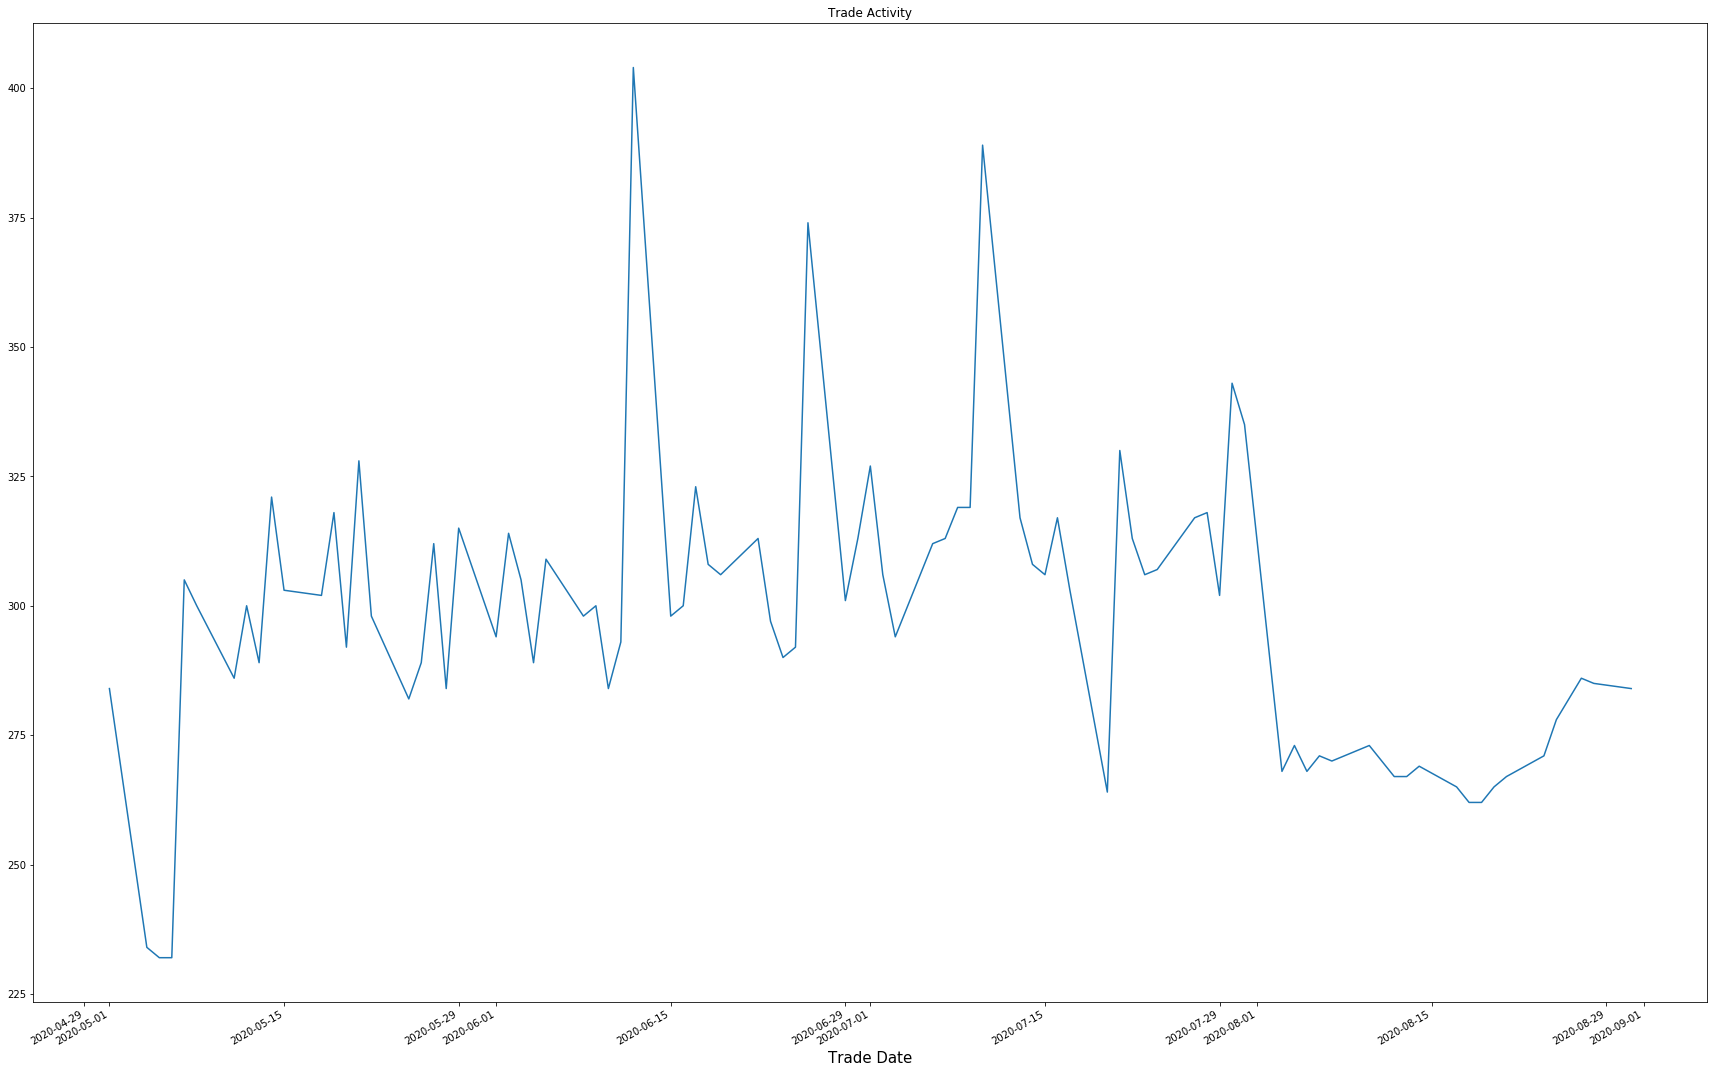

In [5]:
"""
What client activity trends do you see?

Client activity is the lowest during May and peaks in June. 
In August client activity is relatively low when compared to Jun and July but there is much less volatility 
in terms number of transactions during August.

Highest trade activity count:404 occurs on 2020-06-12 
Lowest trade activity count:232 occurs on 2020-05-05
"""

# Max and min trade activity
max_trds = positions_merged['Date'].value_counts().max()
min_trds = positions_merged['Date'].value_counts().min()
max_date = positions_merged['Date'].value_counts().idxmax()
min_date = positions_merged['Date'].value_counts().idxmin()

print("Highest trade activity count:{} occurs on {}".format(max_trds, max_date))
print("Lowest trade activity count:{} occurs on {}".format(min_trds, min_date))
positions_merged['Date'].value_counts().plot(figsize=(30,20),title = 'Trade Activity')
plt.xlabel('Trade Date', fontsize=15)

client_activity_table = positions_merged.set_index('Date')

Client Location
Midwest      231650623218.59
North           127527663.01
Northeast       764053837.21
West             95691518.80
Name: Market Value, dtype: object


Text(0, 0.5, 'Market Value')

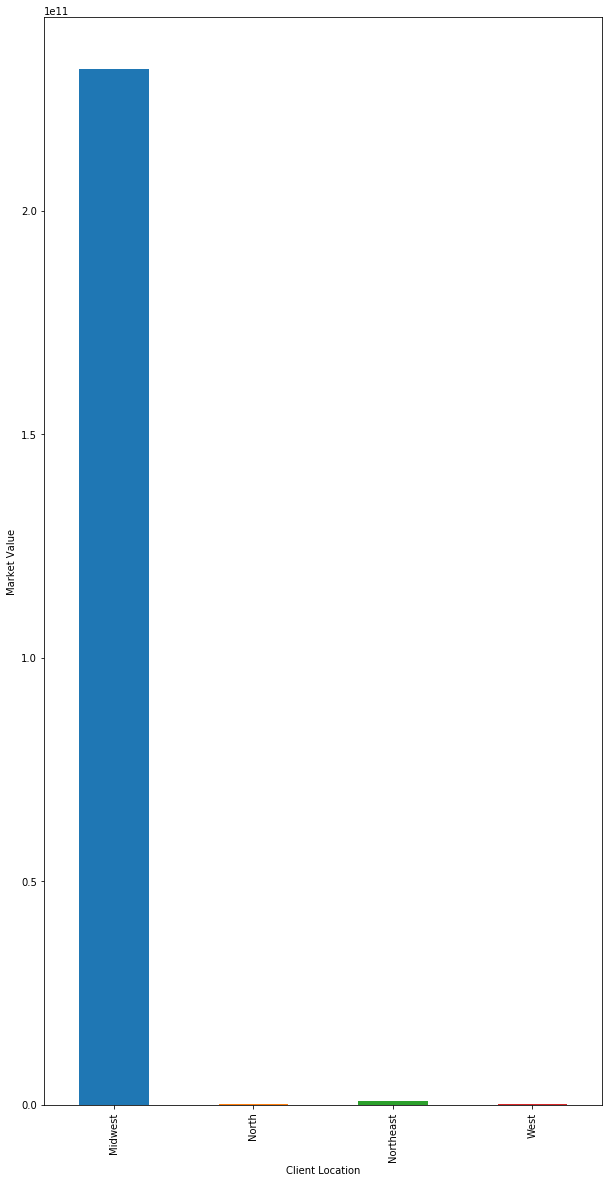

In [6]:
""" 
We see majority of the market value is controlled by those located in the Midwest.
The next largest is the Northeast but is pale in comparison,
"""
region_sum = positions_merged.groupby('Client Location')['Market Value'].sum()
print(region_sum.apply(lambda x: '{0:.2f}'.format(x)))


region_sum.plot(kind='bar',figsize=(10,20))
plt.ylabel('Market Value')

Client Type
Hydroponitc        54930213.16
Industrial     232056014860.38
Organic           441874498.27
Traditional        85076665.81
Name: Market Value, dtype: object


Text(0, 0.5, 'Market Value')

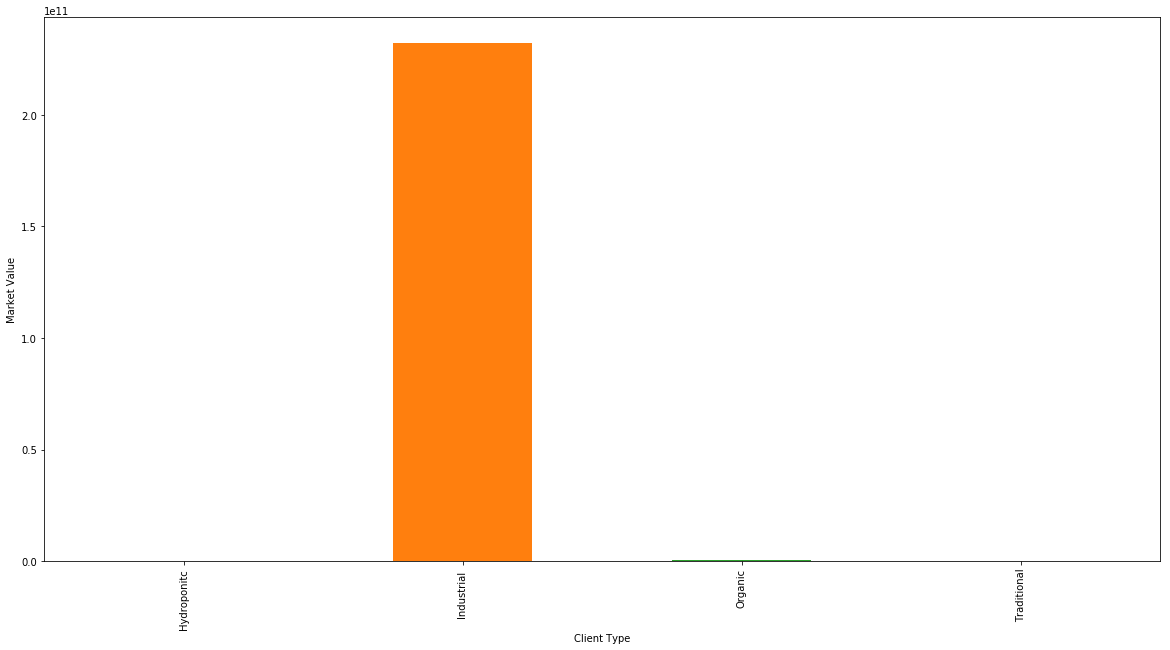

In [7]:
""" Majortiy of the market share is controlled by clients in the Industrial field """
industry_sum = positions_merged.groupby('Client Type')['Market Value'].sum()
print(industry_sum.apply(lambda x: '{0:.2f}'.format(x)))
industry_sum.plot(kind='bar', figsize=(20,10))
plt.ylabel('Market Value')

Max Price of 1519.7 occurs on 2020-08-31 00:00:00
Min Price of 0.0 occurs on 2020-05-04 00:00:00


Text(0, 0.5, 'Price')

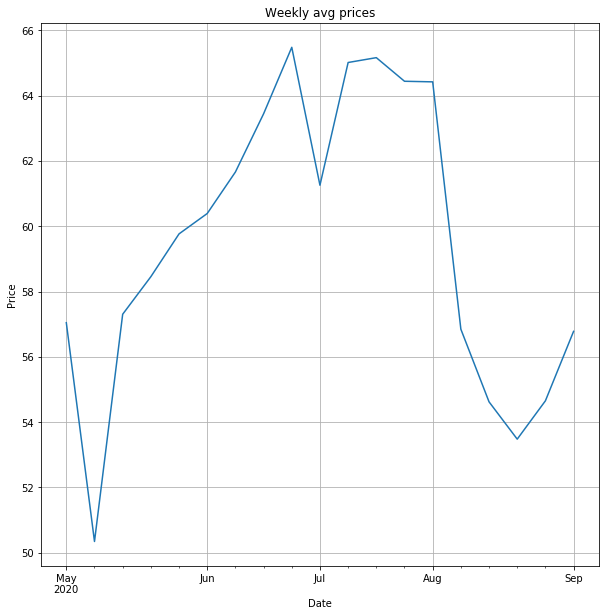

In [8]:
#What potato price trends do you see?
"""
Generally speaking you can use seasonality to help predict potato prices as it seems, there are times,
when the price increases drastically for the entire market (Jun/July) and it drops significantly in May.
"""
# Add a millisecond to each date to create a unique index. This allows us to turn the pricing data into a Timeseries
positions_merged['Date'] = positions_merged['Date'] + \
                            pd.to_timedelta(positions_merged.groupby('Date').cumcount(), unit='ms')
price_trends = positions.set_index('Date') # Overall market for poato trading

# Compute summary statistics
max_price = price_trends.Price.max()
min_price = price_trends.Price.min()
max_date = price_trends.Price.idxmax()
min_date = price_trends.Price.idxmin()

print("Max Price of {} occurs on {}".format(max_price, max_date))
print("Min Price of {} occurs on {}".format(min_price, min_date))

# Daily data is hard to draw a conlucsion on, weekly gives a better picture of the price movements for all potatoes.
weekly = price_trends['Price'].resample('W').mean()
weekly.plot(grid = True, figsize=(10,10),title='Weekly avg prices')
plt.ylabel("Price")


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

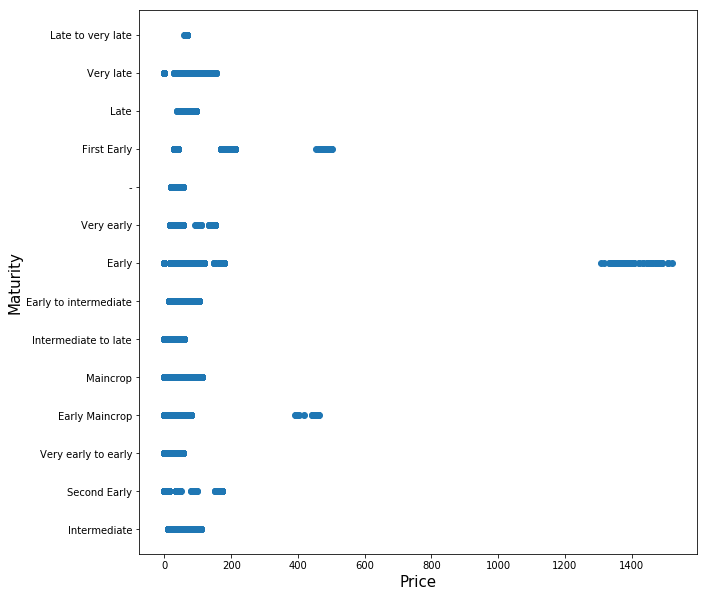

In [9]:
#Are there any factors that can help predict potato prices?
"""
Yes it appears that the maturity of the potato can help predict the potato price.
Potato prices have some of the highest prices, where the  maturiy is shorter.
Longer maturites tend to have a stable price.

We can further build on this by categorzing the maturities and computing the corrleation between the price.
Because of time constratints I will leave the excercise for future enhancements
"""
potato_prices = positions.merge(potato_info, on='Product ID')
plt.figure(figsize = (10,10))
plt.xlabel('Price', fontsize=15)
plt.ylabel('Maturity', fontsize=15)
plt.scatter(potato_prices['Price'], potato_prices['Maturity'])
sns.despine

In [15]:
#Are there any factors that can help predict client activity? 
"""
 A good indicator for client activity is their region, with a dominant portion of traders coming from clients in the 
 midwest.

 Another indicator for trading activity is the the industry where there is strong correlation between Industrial 
 clients and trading activity.
 
 Another indicator is the potato maturity
"""
positions_merged.groupby(['Maturity'])['Date'].count()


Maturity
-                         790
Early                    4032
Early Maincrop           2628
Early to intermediate    1968
First Early              1283
Intermediate             4217
Intermediate to late     2751
Late                     1043
Late to very late          51
Maincrop                 2569
Second Early             1180
Very early               1720
Very early to early       941
Very late                 706
Name: Date, dtype: int64

Text(0, 0.5, 'Price')

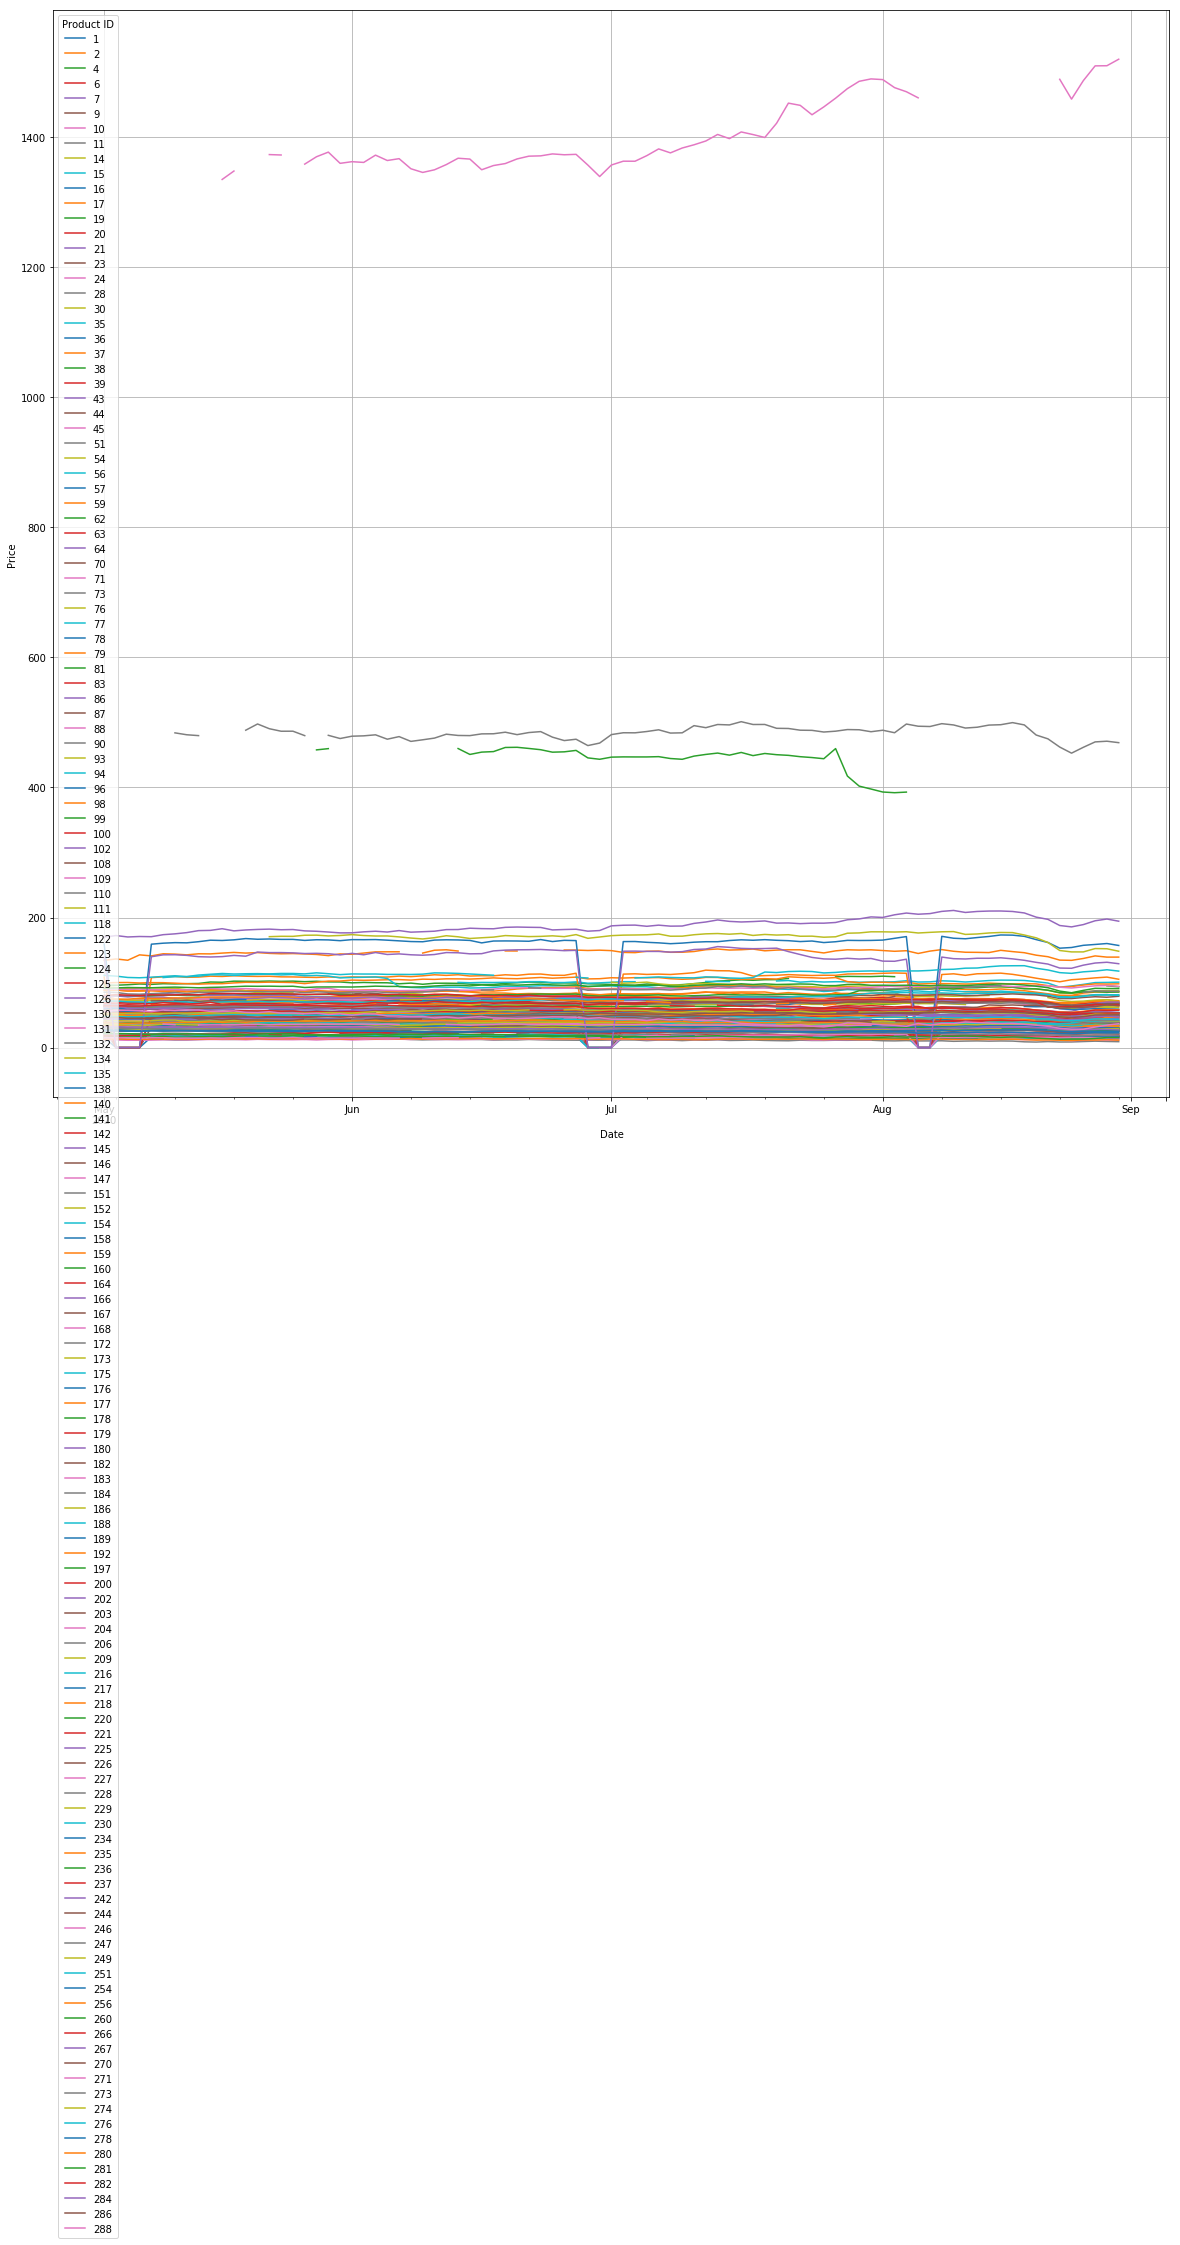

In [11]:
# Summarize what has happened during th? 
"""
During this period the activity and prices are their lowest in May and peak in June.
Summer months appear to be where the highest activity and prices occur for this product type.

The fact that activity and pricing is consistent is intitutive. One would reason, that as market interest
increases for a particular product, the price will be driven higher.

Potato prices movements are generally in line with each other, following similar trends.

Client market control is heavily favored by clients coming from the Industrial sector in the Midwest region.
"""
pivoted = pd.pivot_table(price_trends, values='Price', columns='Product ID', index='Date')
pivoted.idxmax(1).to_frame().T

pivoted.plot(grid = True, figsize=(20,20))
plt.ylabel("Price")
#print(pivoted.corr())